**Name: Hassan Mansoor**

**CMS: 403544**

**Class: BSCS12A**

**Deep Learning Grp 1**

**Assignment 02**

# **Importing The Dataset**

In [1]:
!pip install -q kaggle # kaggle api

Downloading Kaggle API JSON

In [2]:
from google.colab import files
files.upload()  # my own kaggle api


Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"hassanmansoor1569","key":"d789d143cb9c2cde995cf6368a0b73ee"}'}

In [3]:
!mkdir -p ~/.kaggle
!mv kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json


In [4]:
# Download dataset
!kaggle competitions download -c face-classification-deep-learning-cs-405
!unzip -q face-classification-deep-learning-cs-405.zip

*Check The Data*

In [5]:
import os

In [6]:
identities1 = [identity for identity in os.listdir("/content/dataset/train" ) if os.path.isdir(os.path.join("/content/dataset/train" , identity))]

# Get the number of identities
num_identities1 = len(identities1)
print(f"Number of identities in the train dataset: {num_identities1}")


Number of identities in the train dataset: 7000


# **Dataset Creation and Data Splitting**

Import libraries needed

In [7]:
import os
import shutil
import random
from sklearn.model_selection import train_test_split


**Splitting The Dataset**

In [8]:
# Define dataset paths
DATASET_PATH = "/content/dataset/train"
TEST_PATH = "/content/dataset/test"

In [9]:
# Define split ratios..
TRAIN_SPLIT = 0.8
VALID_SPLIT = 0.1
TEST_SPLIT = 0.1

In [10]:
## new folders for storing split data....
BASE_DIR = "/content/split_dataset"
TRAIN_DIR = os.path.join(BASE_DIR, "train")
VAL_DIR = os.path.join(BASE_DIR, "val")
TEST_DIR = os.path.join(BASE_DIR, "test")

 #create directories
#for directory in [TRAIN_DIR, VAL_DIR, TEST_DIR]:
   #os.makedirs(directory, exist_ok=True)

# **Function To Split The Data**

another test

In [ ]:
!pip install -q insightface
!pip install -q onnxruntime-gpu


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 439.5/439.5 kB 11.9 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 16.0/16.0 MB 42.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 280.8/280.8 MB 4.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 46.0/46.0 kB 3.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 86.8/86.8 kB 8.0 MB/s eta 0:00:00


In [ ]:
from insightface.app import FaceAnalysis

# Initialize face detector
app = FaceAnalysis(name="buffalo_l")  # 'buffalo_l' is a fast & accurate model
app.prepare(ctx_id=0, det_size=(224, 224))  # ctx_id=0 uses GPU


In [13]:
from PIL import Image
import numpy as np

def detect_and_crop_retinaface(image_path):
    try:
        img = Image.open(image_path).convert("RGB")
        img_np = np.array(img)

        faces = app.get(img_np)

        if faces:
            face = faces[0]
            box = face.bbox.astype(int)  # bounding box: [x1, y1, x2, y2]
            cropped_face = img.crop((box[0], box[1], box[2], box[3]))
            face_resized = cropped_face.resize((224, 224))
            return face_resized
        else:
            return img
    except:
        return None


In [14]:
from concurrent.futures import ThreadPoolExecutor
import os
import random

def process_image_retina(image_path, identity_subdir, img_name):
    face = detect_and_crop_retinaface(image_path)
    if face is not None:
        face.save(os.path.join(identity_subdir, img_name))

def split_dataset_retina_parallel(source_dir, train_dir, val_dir, test_dir, train_size=0.8, val_size=0.1):
    identities = os.listdir(source_dir)

    for identity in identities:
        identity_path = os.path.join(source_dir, identity)
        if not os.path.isdir(identity_path):
            continue

        images = os.listdir(identity_path)
        random.shuffle(images)

        train_count = int(len(images) * train_size)
        val_count = int(len(images) * val_size)

        train_images = images[:train_count]
        val_images = images[train_count:train_count + val_count]
        test_images = images[train_count + val_count:]

        for sub_dir, img_list in zip([train_dir, val_dir, test_dir], [train_images, val_images, test_images]):
            identity_subdir = os.path.join(sub_dir, identity)
            os.makedirs(identity_subdir, exist_ok=True)

            with ThreadPoolExecutor(max_workers=8) as executor:
                for img_name in img_list:
                    image_path = os.path.join(identity_path, img_name)
                    executor.submit(process_image_retina, image_path, identity_subdir, img_name)


Run splitting

In [15]:
# split_dataset_retina_parallel(DATASET_PATH, TRAIN_DIR, VAL_DIR, TEST_DIR)
# print("Dataset splitting with RetinaFace completed!")


In [16]:
# save and Zip the dataset
#!zip -r split_dataset.zip /content/split_dataset


In [17]:
# i already saved the split data - to not keep splitting at every run
# importing the split data
# google drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [18]:
# copy to drive
# !cp split_dataset.zip /content/drive/MyDrive/


Get already saved split_dataset from drive

In [19]:
!cp "/content/drive/MyDrive/split_dataset.zip" .

In [20]:
!unzip "/content/split_dataset.zip" -d "/"

Streaming output truncated to the last 5000 lines.
  inflating: /content/split_dataset/val/n001745/0129_01.jpg  
  inflating: /content/split_dataset/val/n001745/0247_01.jpg  
   creating: /content/split_dataset/val/n002881/
  inflating: /content/split_dataset/val/n002881/0025_01.jpg  
  inflating: /content/split_dataset/val/n002881/0101_01.jpg  
   creating: /content/split_dataset/val/n008460/
  inflating: /content/split_dataset/val/n008460/0416_01.jpg  
  inflating: /content/split_dataset/val/n008460/0324_01.jpg  
   creating: /content/split_dataset/val/n005030/
  inflating: /content/split_dataset/val/n005030/0013_01.jpg  
  inflating: /content/split_dataset/val/n005030/0113_01.jpg  
   creating: /content/split_dataset/val/n000881/
  inflating: /content/split_dataset/val/n000881/0226_02.jpg  
  inflating: /content/split_dataset/val/n000881/0058_01.jpg  
   creating: /content/split_dataset/val/n008982/
  inflating: /content/split_dataset/val/n008982/0025_01.jpg  
  inflating: /content/

Check if split properly done

In [21]:
def count_images_in_folder(folder_path):
    total_images = 0
    identities = os.listdir(folder_path)
    for identity in identities:
        identity_path = os.path.join(folder_path, identity)
        if os.path.isdir(identity_path):
            total_images += len(os.listdir(identity_path))
    return total_images

train_images = count_images_in_folder(TRAIN_DIR)
val_images = count_images_in_folder(VAL_DIR)
test_images = count_images_in_folder(TEST_DIR)

print(f"Train images: {train_images}")
print(f"Validation images: {val_images}")
print(f"Test images: {test_images}")

total = train_images + val_images + test_images

print("Total images: ",total)
if total == 140000:
  print("\nCorrectly splitted!")
else:
  print("Split is wrong, check again!")


Train images: 112000
Validation images: 14000
Test images: 14000
Total images:  140000

Correctly splitted!


# **Standardization And Normalization**

In [22]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator # using ImageDataGenerator

In [23]:
train_datagen = ImageDataGenerator(
    rescale=1./255,               # Normalize pixel values to [0,1]
    horizontal_flip=True,
    rotation_range=14, # 14 degree shift
    brightness_range=(0.8, 1.2)
)

val_datagen = ImageDataGenerator(rescale=1./255)

**Create data loaders**

In [24]:
# for train
train_generator = train_datagen.flow_from_directory(
    TRAIN_DIR,
    target_size=(224, 224),
    batch_size=32,
    class_mode="categorical"
)


Found 112000 images belonging to 7000 classes.


In [25]:
# for val
val_generator = val_datagen.flow_from_directory(
    VAL_DIR,
    target_size=(224, 224),
    batch_size=32,
    class_mode="categorical",
    shuffle=False
)

Found 14000 images belonging to 7000 classes.


In [26]:
# for test set
test_generator = val_datagen.flow_from_directory(TEST_DIR,
                                                 target_size=(224, 224),
                                                 batch_size=32,
                                                 class_mode="categorical",
                                                 shuffle=False)

Found 14000 images belonging to 7000 classes.


***WHAT THIS DOES:***

The code defines data augmentation and normalization techniques for the training process. For training, it normalizes images to a [0, 1] range and applies random rotation *up to 14°* and *horizontal flips* to improve generalization. Validation and test data are only normalized without augmentation.

It resizes pics to **224x224**, and applies one hot encoding. The training set uses both augmentation and normalization, while the validation and test sets use only normalization, with the test set having shuffle=False.

**Display the images along with labels**

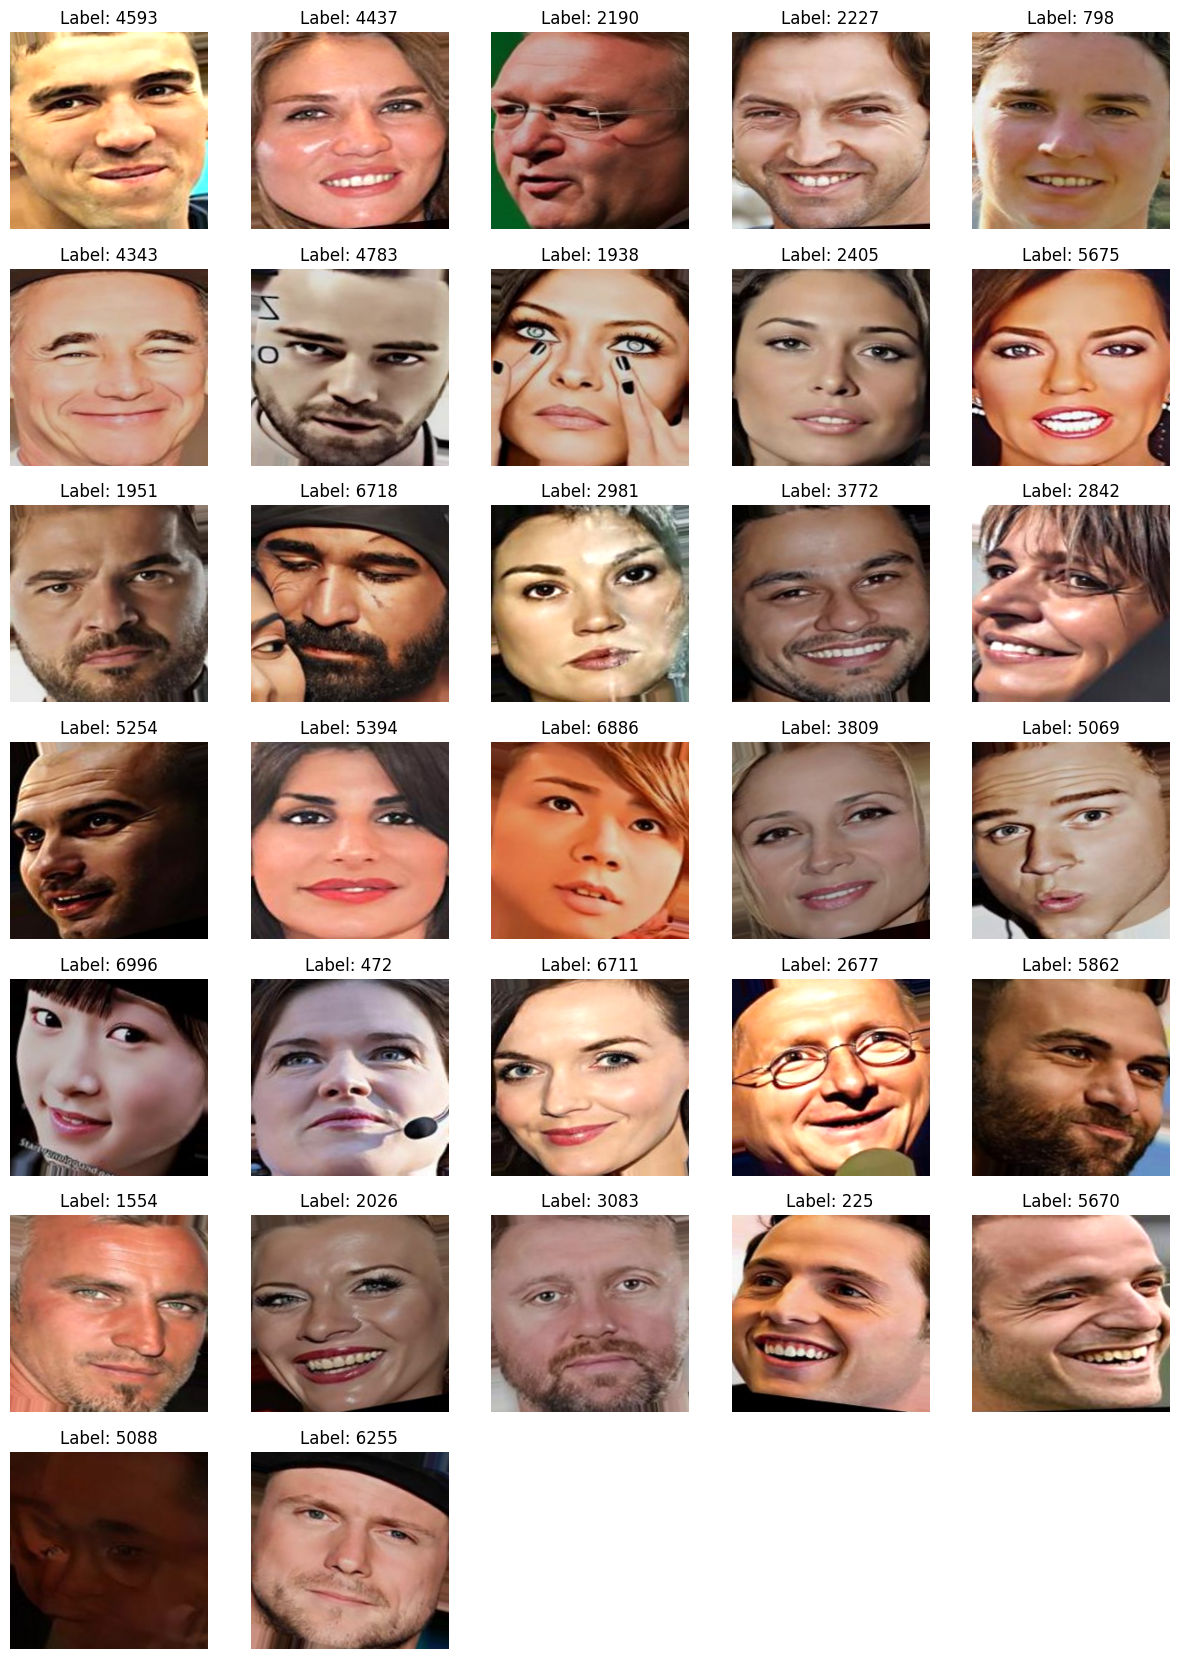

In [27]:
import numpy as np
import matplotlib.pyplot as plt

def display_images(generator):
    # batch
    data_iter = iter(generator)
    batch = next(data_iter)

    inputs, labels = batch

    # Convert the batch to NumPy arrays
    inputs = np.array(inputs)
    labels = np.argmax(labels, axis=1)

    # function to display images and labels
    def show_images(images, labels):
        num_images = len(images)
        num_cols = 5
        num_rows = (num_images + num_cols - 1) // num_cols

        plt.figure(figsize=(15, 3 * num_rows))
        for i in range(num_images):
            plt.subplot(num_rows, num_cols, i + 1)
            plt.imshow(images[i])
            plt.title(f"Label: {labels[i]}")
            plt.axis("off")

    show_images(inputs, labels)
    plt.show()

display_images(train_generator)

Check augmentation

Train Batch - Images shape: (32, 224, 224, 3)
Train Batch - Labels shape: (32, 7000)
Class labels in train set: {'n000001': 0, 'n000002': 1, 'n000003': 2, 'n000004': 3, 'n000005': 4, 'n000008': 5, 'n000011': 6, 'n000012': 7, 'n000013': 8, 'n000014': 9, 'n000015': 10, 'n000016': 11, 'n000017': 12, 'n000018': 13, 'n000019': 14, 'n000020': 15, 'n000021': 16, 'n000022': 17, 'n000023': 18, 'n000024': 19, 'n000025': 20, 'n000026': 21, 'n000027': 22, 'n000029': 23, 'n000030': 24, 'n000031': 25, 'n000034': 26, 'n000035': 27, 'n000036': 28, 'n000037': 29, 'n000038': 30, 'n000040': 31, 'n000041': 32, 'n000042': 33, 'n000043': 34, 'n000044': 35, 'n000045': 36, 'n000046': 37, 'n000047': 38, 'n000048': 39, 'n000049': 40, 'n000050': 41, 'n000051': 42, 'n000052': 43, 'n000053': 44, 'n000054': 45, 'n000055': 46, 'n000056': 47, 'n000057': 48, 'n000058': 49, 'n000059': 50, 'n000060': 51, 'n000061': 52, 'n000062': 53, 'n000063': 54, 'n000066': 55, 'n000067': 56, 'n000068': 57, 'n000069': 58, 'n000070': 5

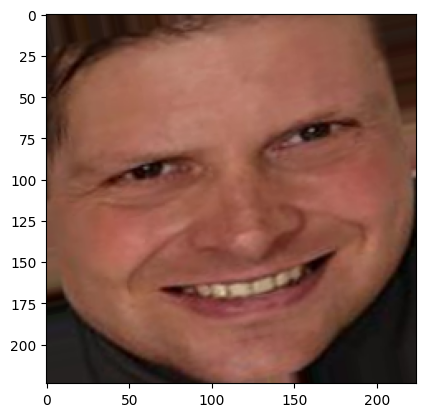

range 0.0 to 1.0


In [28]:
import matplotlib.pyplot as plt
# Check number of batches, class labels, and shape of the first batch
train_batch = next(train_generator)
val_batch = next(val_generator)

print("Train Batch - Images shape:", train_batch[0].shape)
print("Train Batch - Labels shape:", train_batch[1].shape)

# Check class labels
print("Class labels in train set:", train_generator.class_indices)

plt.imshow(train_batch[0][1])  # First image in the batch
plt.show()

# Check the pixel range for a few images
print("range", train_batch[0].min(), "to", train_batch[0].max())



Seems okay!

# **Building the Deep Face Classifier**

**Backbone Selection**

We'll use two CNN models:

**ResNet50**: A deep residual network that helps mitigate the vanishing gradient problem by using residual (skip) connections.

**Xception**: An extreme version of the Inception architecture, Xception replaces standard convolutions with depthwise separable convolutions, making it more efficient and powerful.

Let's start by importing the libraries needed

In [29]:
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.applications import ResNet50, EfficientNetB0,DenseNet121, Xception
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping
from tensorflow.keras.layers import ReLU, LeakyReLU, Add, Activation, Dense, BatchNormalization, Dropout
from tensorflow.keras.layers import GlobalAveragePooling2D, Flatten, Input
from tensorflow.keras.layers import Conv2D
from tensorflow.keras.activations import elu
from tensorflow.keras.regularizers import l2



# **Creating The Models**

In [30]:
from tensorflow.keras import mixed_precision
mixed_precision.set_global_policy('mixed_float16')

Create The Resnet Model

In [31]:
import tensorflow as tf
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, GlobalAveragePooling2D, Dense, BatchNormalization, ReLU, Dropout
from tensorflow.keras.regularizers import l2

def create_vggface2_resnet50(input_shape=(224, 224, 3), num_classes=7000):
    """
    Creates the ResNet50 architecture.
    """
    base_model = tf.keras.applications.ResNet50(
        weights=None,  # We'll load the weights separately
        include_top=False,
        input_shape=input_shape
    )

    base_model.load_weights('/content/best_vggface2_resnet_model (1).h5', by_name=True, skip_mismatch=True)

    # Freeze the base model layers
    for layer in base_model.layers:
        layer.trainable = False

    for layer in base_model.layers[-35:]:
        layer.trainable = True

    # add custom layers
    x = base_model.output
    x = GlobalAveragePooling2D()(x)
    x = Dropout(0.4)(x)
    x = Dense(512, kernel_regularizer=l2(1e-4))(x)
    x = BatchNormalization()(x)
    x = ReLU()(x)
    x = Dropout(0.2)(x)

    # output layer with softmax activation
    predictions = Dense(num_classes, activation='softmax', dtype='float32')(x)

    # create the final model
    model = Model(inputs=base_model.input, outputs=predictions)
    return model


  **WHAT THIS DOES:**
    
    Parameters:
    - num_classes: Number of face classes to classify
    - input_shape: Input image dimensions (224x224x3)
    
    Architecture Steps:
    1. Load pretrained backbone:
       - ResNet50
    
    2. Remove top classification layers
    
    3. Add Global Average Pooling
    
    4. Add custom classification head:
       - Dense -> BatchNorm -> ReLU -> Dropout
    
    5. Add final softmax layer for classification
    
    Returns:
    - Final Keras Model ready for training or inference


**Train Model**

In [32]:
from tensorflow.keras.callbacks import ReduceLROnPlateau, EarlyStopping, ModelCheckpoint
from tensorflow.keras.optimizers import Adam
import tensorflow as tf
from tensorflow.keras.losses import CategoricalCrossentropy

def train_model(model, model_name, train_generator, val_generator):
    """
    Training function with careful learning rate and callbacks
    """
    callbacks = [
        ModelCheckpoint(
            f'best_{model_name}_model.h5',
            monitor='val_accuracy',
            save_best_only=True,
            verbose=1
        ),
        ReduceLROnPlateau(
            monitor='val_loss',
            factor=0.4,
            patience=2,
            min_lr=1e-7,
            verbose=1
        ),
        EarlyStopping(
            monitor='val_loss',
            patience=5,
            restore_best_weights=True,
            verbose=1
        )
    ]

    # Compile model with conservative learning rate
    model.compile(
        optimizer=Adam(
            learning_rate=5e-5,
            epsilon=1e-8,
            clipnorm=1.0  # Gradient clipping
        ),
        loss=CategoricalCrossentropy(label_smoothing=0.1),
        metrics=['accuracy', 'top_k_categorical_accuracy']
    )

    # Train the model
    history = model.fit(
        train_generator,
        validation_data=val_generator,
        epochs=10,
        callbacks=callbacks
    )

    return history

***WHAT THIS DOES:***

    Trains a Keras model with performance-boosting callbacks and stable optimization.

    Parameters:
    - model: Compiled Keras model to train
    - model_name: Identifier string used for saving the best model
    - train_generator: Training data generator
    - val_generator: Validation data generator

    Training Pipeline:
    1. Compile model with:
      - Adam optimizer (low learning rate, gradient clipping)
      - Categorical cross-entropy loss with label smoothing
      - Accuracy + Top-5 Accuracy as metrics

    2. Use key callbacks:
      - ModelCheckpoint: Saves best model (based on val_accuracy)
      - ReduceLROnPlateau: Reduces LR if val_loss plateaus
      - EarlyStopping: Stops early if no improvement in val_loss

    3. Train model for up to 10 epochs with validation

    Returns:
    - Training history object

# **Training The Resnet Model**

In [ ]:
# defining the model architecture
vggface2_resnet_model = create_vggface2_resnet50(input_shape=(224, 224, 3), num_classes=7000)

In [ ]:
print("\nVGGFace2 ResNet50 Model Summary:")
vggface2_resnet_model.summary()


VGGFace2 ResNet50 Model Summary:


Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)              ┃ Output Shape           ┃        Param # ┃ Connected to           ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)  │ (None, 224, 224, 3)    │              0 │ -                      │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ cast (Cast)               │ (None, 224, 224, 3)    │              0 │ input_layer[0][0]      │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv1_pad (ZeroPadding2D) │ (None, 230, 230, 3)    │              0 │ cast[0][0]             │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv1_conv (Conv2D)       │ (None, 112, 112, 64)   │          9,472 │ conv1_pad[0][0]        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv1_bn                  │ (None, 112, 112, 64)   │            256 │ conv1_conv[0][0]       │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv1_relu (Activation)   │ (None, 112, 112, 64)   │              0 │ conv1_bn[0][0]         │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ pool1_pad (ZeroPadding2D) │ (None, 114, 114, 64)   │              0 │ conv1_relu[0][0]       │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ pool1_pool (MaxPooling2D) │ (None, 56, 56, 64)     │              0 │ pool1_pad[0][0]        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_1_conv       │ (None, 56, 56, 64)     │          4,160 │ pool1_pool[0][0]       │
│ (Conv2D)                  │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_1_bn         │ (None, 56, 56, 64)     │            256 │ conv2_block1_1_conv[0… │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_1_relu       │ (None, 56, 56, 64)     │              0 │ conv2_block1_1_bn[0][… │
│ (Activation)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_2_conv       │ (None, 56, 56, 64)     │         36,928 │ conv2_block1_1_relu[0… │
│ (Conv2D)                  │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_2_bn         │ (None, 56, 56, 64)     │            256 │ conv2_block1_2_conv[0… │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_2_relu       │ (None, 56, 56, 64)     │              0 │ conv2_block1_2_bn[0][… │
│ (Activation)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_0_conv       │ (None, 56, 56, 256)    │         16,640 │ pool1_pool[0][0]       │
│ (Conv2D)                  │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_3_conv  

 Total params: 28,229,848 (107.69 MB)

 Trainable params: 13,572,440 (51.77 MB)

 Non-trainable params: 14,657,408 (55.91 MB)

In [ ]:
# Train the model
vggface2_resnet_history = train_model(vggface2_resnet_model, 'vggface2_resnet', train_generator, val_generator)

/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/10
3500/3500 ━━━━━━━━━━━━━━━━━━━━ 0s 433ms/step - accuracy: 0.0294 - loss: 8.1318 - top_k_categorical_accuracy: 0.0734
Epoch 1: val_accuracy improved from -inf to 0.22236, saving model to best_vggface2_resnet_model.h5


3500/3500 ━━━━━━━━━━━━━━━━━━━━ 1575s 442ms/step - accuracy: 0.0294 - loss: 8.1315 - top_k_categorical_accuracy: 0.0734 - val_accuracy: 0.2224 - val_loss: 5.6576 - val_top_k_categorical_accuracy: 0.4068 - learning_rate: 5.0000e-04
Epoch 2/10
3500/3500 ━━━━━━━━━━━━━━━━━━━━ 0s 421ms/step - accuracy: 0.2213 - loss: 5.5343 - top_k_categorical_accuracy: 0.4200
Epoch 2: val_accuracy improved from 0.22236 to 0.32921, saving model to best_vggface2_resnet_model.h5


3500/3500 ━━━━━━━━━━━━━━━━━━━━ 1497s 428ms/step - accuracy: 0.2213 - loss: 5.5343 - top_k_categorical_accuracy: 0.4200 - val_accuracy: 0.3292 - val_loss: 5.1224 - val_top_k_categorical_accuracy: 0.5217 - learning_rate: 5.0000e-04
Epoch 3/10
3500/3500 ━━━━━━━━━━━━━━━━━━━━ 0s 424ms/step - accuracy: 0.3344 - loss: 4.9044 - top_k_categorical_accuracy: 0.5564
Epoch 3: val_accuracy improved from 0.32921 to 0.38500, saving model to best_vggface2_resnet_model.h5


3500/3500 ━━━━━━━━━━━━━━━━━━━━ 1505s 430ms/step - accuracy: 0.3344 - loss: 4.9044 - top_k_categorical_accuracy: 0.5564 - val_accuracy: 0.3850 - val_loss: 4.8618 - val_top_k_categorical_accuracy: 0.5759 - learning_rate: 5.0000e-04
Epoch 4/10
3500/3500 ━━━━━━━━━━━━━━━━━━━━ 0s 440ms/step - accuracy: 0.4089 - loss: 4.5406 - top_k_categorical_accuracy: 0.6304
Epoch 4: val_accuracy improved from 0.38500 to 0.42036, saving model to best_vggface2_resnet_model.h5


3500/3500 ━━━━━━━━━━━━━━━━━━━━ 1562s 446ms/step - accuracy: 0.4089 - loss: 4.5406 - top_k_categorical_accuracy: 0.6304 - val_accuracy: 0.4204 - val_loss: 4.6776 - val_top_k_categorical_accuracy: 0.6110 - learning_rate: 5.0000e-04
Epoch 5/10
3500/3500 ━━━━━━━━━━━━━━━━━━━━ 0s 432ms/step - accuracy: 0.4688 - loss: 4.2462 - top_k_categorical_accuracy: 0.6854
Epoch 5: val_accuracy improved from 0.42036 to 0.43943, saving model to best_vggface2_resnet_model.h5


3500/3500 ━━━━━━━━━━━━━━━━━━━━ 1536s 439ms/step - accuracy: 0.4688 - loss: 4.2462 - top_k_categorical_accuracy: 0.6854 - val_accuracy: 0.4394 - val_loss: 4.5620 - val_top_k_categorical_accuracy: 0.6290 - learning_rate: 5.0000e-04
Epoch 6/10
3500/3500 ━━━━━━━━━━━━━━━━━━━━ 0s 430ms/step - accuracy: 0.5114 - loss: 4.0325 - top_k_categorical_accuracy: 0.7238
Epoch 6: val_accuracy improved from 0.43943 to 0.46179, saving model to best_vggface2_resnet_model.h5


3500/3500 ━━━━━━━━━━━━━━━━━━━━ 1547s 442ms/step - accuracy: 0.5114 - loss: 4.0325 - top_k_categorical_accuracy: 0.7238 - val_accuracy: 0.4618 - val_loss: 4.4628 - val_top_k_categorical_accuracy: 0.6456 - learning_rate: 5.0000e-04
Epoch 7/10
3500/3500 ━━━━━━━━━━━━━━━━━━━━ 0s 428ms/step - accuracy: 0.5436 - loss: 3.8668 - top_k_categorical_accuracy: 0.7520
Epoch 7: val_accuracy improved from 0.46179 to 0.47179, saving model to best_vggface2_resnet_model.h5


3500/3500 ━━━━━━━━━━━━━━━━━━━━ 1519s 434ms/step - accuracy: 0.5436 - loss: 3.8668 - top_k_categorical_accuracy: 0.7520 - val_accuracy: 0.4718 - val_loss: 4.3991 - val_top_k_categorical_accuracy: 0.6571 - learning_rate: 5.0000e-04
Epoch 8/10
3500/3500 ━━━━━━━━━━━━━━━━━━━━ 0s 450ms/step - accuracy: 0.5810 - loss: 3.7034 - top_k_categorical_accuracy: 0.7791
Epoch 8: val_accuracy improved from 0.47179 to 0.48957, saving model to best_vggface2_resnet_model.h5


3500/3500 ━━━━━━━━━━━━━━━━━━━━ 1595s 456ms/step - accuracy: 0.5810 - loss: 3.7035 - top_k_categorical_accuracy: 0.7790 - val_accuracy: 0.4896 - val_loss: 4.3391 - val_top_k_categorical_accuracy: 0.6681 - learning_rate: 5.0000e-04
Epoch 9/10
3500/3500 ━━━━━━━━━━━━━━━━━━━━ 0s 438ms/step - accuracy: 0.6042 - loss: 3.5828 - top_k_categorical_accuracy: 0.7970
Epoch 9: val_accuracy improved from 0.48957 to 0.49214, saving model to best_vggface2_resnet_model.h5


3500/3500 ━━━━━━━━━━━━━━━━━━━━ 1575s 450ms/step - accuracy: 0.6042 - loss: 3.5828 - top_k_categorical_accuracy: 0.7970 - val_accuracy: 0.4921 - val_loss: 4.2983 - val_top_k_categorical_accuracy: 0.6710 - learning_rate: 5.0000e-04
Epoch 10/10
3500/3500 ━━━━━━━━━━━━━━━━━━━━ 0s 437ms/step - accuracy: 0.6330 - loss: 3.4541 - top_k_categorical_accuracy: 0.8172
Epoch 10: val_accuracy improved from 0.49214 to 0.51043, saving model to best_vggface2_resnet_model.h5


3500/3500 ━━━━━━━━━━━━━━━━━━━━ 1572s 449ms/step - accuracy: 0.6330 - loss: 3.4542 - top_k_categorical_accuracy: 0.8172 - val_accuracy: 0.5104 - val_loss: 4.2362 - val_top_k_categorical_accuracy: 0.6824 - learning_rate: 5.0000e-04
Restoring model weights from the end of the best epoch: 10.


## ResNet50 - Results

After Epoch 10, the model achieved a top-5 categorical accuracy of ***81.72%*** and a top-1 accuracy of ***63.3%***.

The validation accuracy reached ***68.24%***, with a corresponding validation loss of 4.2362.


# **Plotting Training And Validation Curves**

**Accuracy**

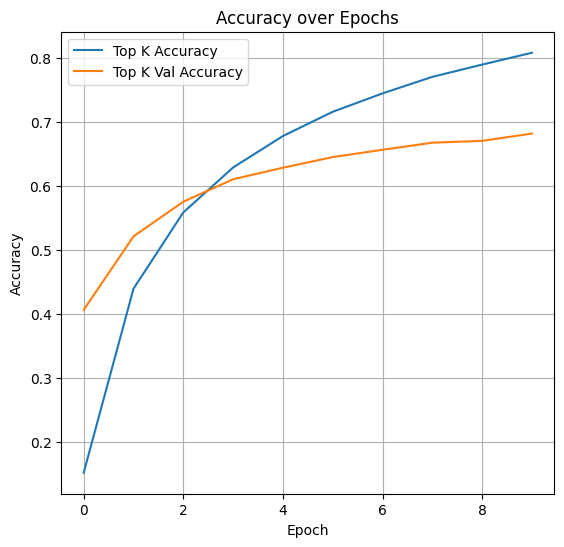

In [ ]:
plt.figure(figsize=(14, 6))
# accuracy (top k)
plt.subplot(1, 2, 1)
plt.plot(history.history['top_k_categorical_accuracy'], label='Top K Accuracy')
plt.plot(history.history['val_top_k_categorical_accuracy'], label='Top K Val Accuracy')
plt.title('Accuracy over Epochs')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)

Basic Accuracy Graph

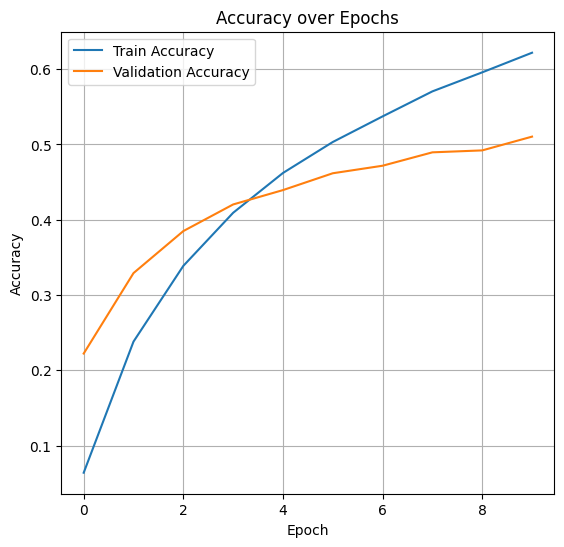

In [ ]:
import matplotlib.pyplot as plt

history = vggface2_resnet_history
plt.figure(figsize=(14, 6))

# accuracy (top 1)
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Accuracy over Epochs')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)

Loss Curve

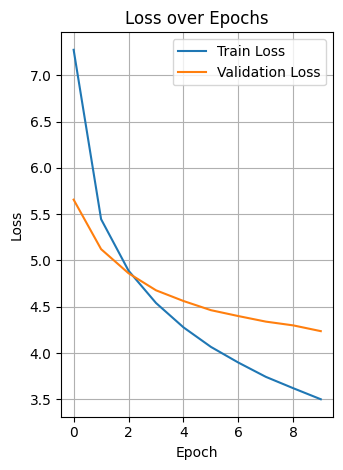

In [ ]:
# loss curve

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Loss over Epochs')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()


# **Fine Tuning Resnet-50**

Lets finetune by unfreezing more layers and lowering the learning rate + increasing the number of epochs ran.

In [ ]:
vggface2_resnet_model = create_vggface2_resnet50(
    input_shape=(224, 224, 3),
    num_classes=7000
)

# load prev model
vggface2_resnet_model.load_weights('/content/best_vggface2_resnet_model (1).h5')

for layer in vggface2_resnet_model.layers:
    layer.trainable = False

# unfreeze more layers
for layer in vggface2_resnet_model.layers[-35:]:
    if not isinstance(layer, tf.keras.layers.BatchNormalization):  # skip BN layers if you want stability
        layer.trainable = True


In [ ]:
vggface2_resnet_model.compile(
    optimizer=Adam(learning_rate=1e-6),
    loss=CategoricalCrossentropy(label_smoothing=0.05),
    metrics=['accuracy', 'top_k_categorical_accuracy']
)

In [ ]:
history_finetune = train_model(vggface2_resnet_model, 'vggface2_resnet', train_generator, val_generator)


Epoch 1/10
3500/3500 ━━━━━━━━━━━━━━━━━━━━ 0s 415ms/step - accuracy: 0.7186 - loss: 3.1259 - top_k_categorical_accuracy: 0.8608

/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()



Epoch 1: val_accuracy improved from -inf to 0.55850, saving model to best_vggface2_resnet_model.h5


3500/3500 ━━━━━━━━━━━━━━━━━━━━ 1508s 426ms/step - accuracy: 0.7186 - loss: 3.1259 - top_k_categorical_accuracy: 0.8608 - val_accuracy: 0.5585 - val_loss: 3.9642 - val_top_k_categorical_accuracy: 0.7216 - learning_rate: 5.0000e-05
Epoch 2/10
3500/3500 ━━━━━━━━━━━━━━━━━━━━ 0s 411ms/step - accuracy: 0.7411 - loss: 3.0333 - top_k_categorical_accuracy: 0.8743
Epoch 2: val_accuracy improved from 0.55850 to 0.55871, saving model to best_vggface2_resnet_model.h5


3500/3500 ━━━━━━━━━━━━━━━━━━━━ 1511s 425ms/step - accuracy: 0.7411 - loss: 3.0333 - top_k_categorical_accuracy: 0.8743 - val_accuracy: 0.5587 - val_loss: 3.9496 - val_top_k_categorical_accuracy: 0.7226 - learning_rate: 5.0000e-05
Epoch 3/10
3500/3500 ━━━━━━━━━━━━━━━━━━━━ 0s 411ms/step - accuracy: 0.7480 - loss: 2.9911 - top_k_categorical_accuracy: 0.8797
Epoch 3: val_accuracy improved from 0.55871 to 0.55950, saving model to best_vggface2_resnet_model.h5


3500/3500 ━━━━━━━━━━━━━━━━━━━━ 1464s 418ms/step - accuracy: 0.7480 - loss: 2.9911 - top_k_categorical_accuracy: 0.8797 - val_accuracy: 0.5595 - val_loss: 3.9401 - val_top_k_categorical_accuracy: 0.7246 - learning_rate: 5.0000e-05
Epoch 4/10
3500/3500 ━━━━━━━━━━━━━━━━━━━━ 0s 408ms/step - accuracy: 0.7573 - loss: 2.9434 - top_k_categorical_accuracy: 0.8857
Epoch 4: val_accuracy improved from 0.55950 to 0.56386, saving model to best_vggface2_resnet_model.h5


3500/3500 ━━━━━━━━━━━━━━━━━━━━ 1449s 414ms/step - accuracy: 0.7573 - loss: 2.9434 - top_k_categorical_accuracy: 0.8857 - val_accuracy: 0.5639 - val_loss: 3.9197 - val_top_k_categorical_accuracy: 0.7254 - learning_rate: 5.0000e-05
Epoch 5/10
3500/3500 ━━━━━━━━━━━━━━━━━━━━ 0s 413ms/step - accuracy: 0.7664 - loss: 2.8983 - top_k_categorical_accuracy: 0.8926
Epoch 5: val_accuracy improved from 0.56386 to 0.56543, saving model to best_vggface2_resnet_model.h5


3500/3500 ━━━━━━━━━━━━━━━━━━━━ 1472s 421ms/step - accuracy: 0.7664 - loss: 2.8983 - top_k_categorical_accuracy: 0.8926 - val_accuracy: 0.5654 - val_loss: 3.8998 - val_top_k_categorical_accuracy: 0.7296 - learning_rate: 5.0000e-05
Epoch 6/10
3500/3500 ━━━━━━━━━━━━━━━━━━━━ 0s 404ms/step - accuracy: 0.7740 - loss: 2.8622 - top_k_categorical_accuracy: 0.8979
Epoch 6: val_accuracy improved from 0.56543 to 0.56829, saving model to best_vggface2_resnet_model.h5


3500/3500 ━━━━━━━━━━━━━━━━━━━━ 1442s 412ms/step - accuracy: 0.7740 - loss: 2.8622 - top_k_categorical_accuracy: 0.8979 - val_accuracy: 0.5683 - val_loss: 3.8903 - val_top_k_categorical_accuracy: 0.7278 - learning_rate: 5.0000e-05
Epoch 7/10
3500/3500 ━━━━━━━━━━━━━━━━━━━━ 0s 409ms/step - accuracy: 0.7828 - loss: 2.8177 - top_k_categorical_accuracy: 0.9020
Epoch 7: val_accuracy improved from 0.56829 to 0.57336, saving model to best_vggface2_resnet_model.h5


3500/3500 ━━━━━━━━━━━━━━━━━━━━ 1453s 415ms/step - accuracy: 0.7828 - loss: 2.8177 - top_k_categorical_accuracy: 0.9020 - val_accuracy: 0.5734 - val_loss: 3.8671 - val_top_k_categorical_accuracy: 0.7336 - learning_rate: 5.0000e-05
Epoch 8/10
3500/3500 ━━━━━━━━━━━━━━━━━━━━ 0s 414ms/step - accuracy: 0.7875 - loss: 2.7853 - top_k_categorical_accuracy: 0.9055
Epoch 8: val_accuracy improved from 0.57336 to 0.57364, saving model to best_vggface2_resnet_model.h5


3500/3500 ━━━━━━━━━━━━━━━━━━━━ 1493s 427ms/step - accuracy: 0.7875 - loss: 2.7853 - top_k_categorical_accuracy: 0.9055 - val_accuracy: 0.5736 - val_loss: 3.8520 - val_top_k_categorical_accuracy: 0.7351 - learning_rate: 5.0000e-05
Epoch 9/10
3500/3500 ━━━━━━━━━━━━━━━━━━━━ 0s 422ms/step - accuracy: 0.7961 - loss: 2.7576 - top_k_categorical_accuracy: 0.9094
Epoch 9: val_accuracy improved from 0.57364 to 0.57536, saving model to best_vggface2_resnet_model.h5


3500/3500 ━━━━━━━━━━━━━━━━━━━━ 1504s 430ms/step - accuracy: 0.7961 - loss: 2.7576 - top_k_categorical_accuracy: 0.9094 - val_accuracy: 0.5754 - val_loss: 3.8440 - val_top_k_categorical_accuracy: 0.7334 - learning_rate: 5.0000e-05
Epoch 10/10
3500/3500 ━━━━━━━━━━━━━━━━━━━━ 0s 410ms/step - accuracy: 0.8020 - loss: 2.7180 - top_k_categorical_accuracy: 0.9145
Epoch 10: val_accuracy did not improve from 0.57536
3500/3500 ━━━━━━━━━━━━━━━━━━━━ 1456s 416ms/step - accuracy: 0.8020 - loss: 2.7180 - top_k_categorical_accuracy: 0.9145 - val_accuracy: 0.5746 - val_loss: 3.8386 - val_top_k_categorical_accuracy: 0.7341 - learning_rate: 5.0000e-05
Restoring model weights from the end of the best epoch: 10.


# **Val/Loss Curves After Finetuning**

Val Accuracy

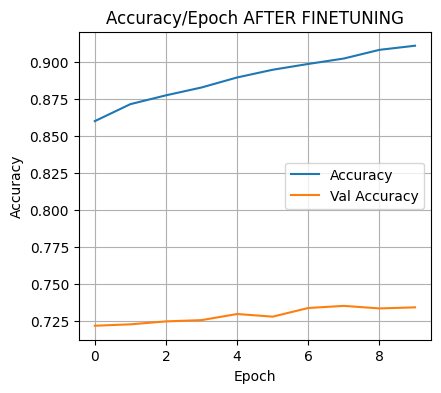

In [ ]:
import matplotlib.pyplot as plt
history = history_finetune
plt.figure(figsize=(10, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['top_k_categorical_accuracy'], label='Accuracy')
plt.plot(history.history['val_top_k_categorical_accuracy'], label='Val Accuracy')
plt.title('Accuracy/Epoch AFTER FINETUNING')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)

Loss

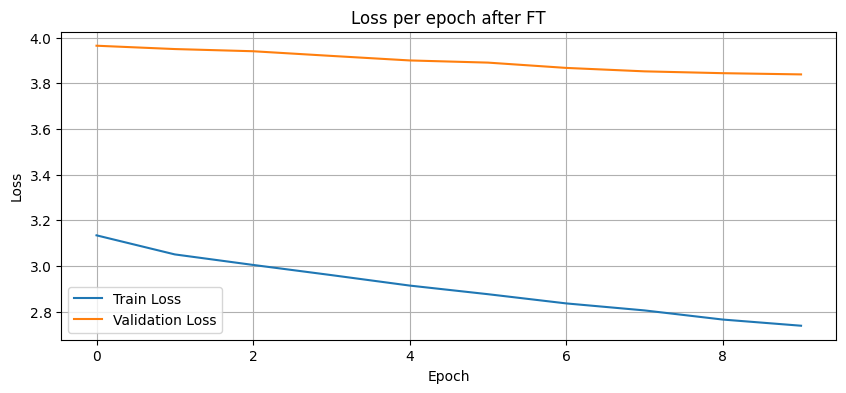

In [ ]:
# Loss Curve
plt.figure(figsize=(10, 4))
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Loss per epoch after FT')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)
plt.show()

**Self-made Test set Evaluation**

In [ ]:
# evaluate the model on the test set
test_loss, test_accuracy, test_top_k_accuracy = vggface2_resnet_model.evaluate(test_generator, verbose=1)

print(f"Test Accuracy: {test_accuracy}")
print(f"Test Loss: {test_loss}")
print(f"Test Top-5 Accuracy: {test_top_k_accuracy}")


/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


438/438 ━━━━━━━━━━━━━━━━━━━━ 28s 64ms/step - accuracy: 0.5766 - loss: 3.8651 - top_k_categorical_accuracy: 0.7317
Test Accuracy: 0.5779285430908203
Test Loss: 3.848369598388672
Test Top-5 Accuracy: 0.7301428318023682


# Results:

The model achieved a training accuracy of **91.5%** and a top-1 categorical accuracy of **80.4%**.

However, the validation accuracy showed a slight increase to **73.1%**, with a corresponding validation loss of **3.84**, indicating some overfitting.


# **Evaluation/CSV File Creation**

In [ ]:
# imports
import pandas as pd
import numpy as np
from tensorflow.keras.preprocessing import image
from tqdm import tqdm
import os

In [ ]:
# path to test images

test_dir = "/content/dataset/test"
cropped_test_dir = "/content/test_cropped"
os.makedirs(cropped_test_dir, exist_ok=True)

crop images

In [ ]:
from tqdm import tqdm
from PIL import Image

for filename in tqdm(os.listdir(test_dir)):
    if filename.lower().endswith(".jpg"):
        img_path = os.path.join(test_dir, filename)
        cropped_img = detect_and_crop_retinaface(img_path)

        if cropped_img:
            # Save cropped face
            cropped_img.save(os.path.join(cropped_test_dir, filename))
        else:
            # If no face detected, save original image
            original_img = Image.open(img_path).convert("RGB").resize((224, 224))
            original_img.save(os.path.join(cropped_test_dir, filename))


100%|██████████| 35000/35000 [13:10<00:00, 44.28it/s]


In [ ]:
# pass images
test_datagen = ImageDataGenerator(rescale=1./255)

test_generator_for_csv = test_datagen.flow_from_directory(
    directory="/content",
    classes=["test_cropped"],
    target_size=(224, 224),
    batch_size=32,
    class_mode=None,
    shuffle=False
)

Found 35000 images belonging to 1 classes.


total 35k images! checks out.

predict images

In [ ]:
# Predict
preds = vggface2_resnet_model.predict(test_generator_for_csv, verbose=1)
predicted_class_indices = np.argmax(preds, axis=1)

/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


1094/1094 ━━━━━━━━━━━━━━━━━━━━ 71s 57ms/step


map class indices to labels

In [ ]:
labels = (train_generator.class_indices)
labels = dict((v, k) for k, v in labels.items())  # reverse mapping
predicted_labels = [labels[i] for i in predicted_class_indices]

create csv file

In [ ]:
filenames = test_generator_for_csv.filenames
image_ids = [os.path.basename(name) for name in filenames]

submission_df = pd.DataFrame({
    'image_name': image_ids,
    'label': predicted_labels
})

submission_df.to_csv("submission.csv", index=False)
print("CSV FILE CREATED!")

CSV FILE CREATED!


In [ ]:
import shutil

# Copy file from Colab storage to Google Drive
src = '/content/submission.csv'
dst = '/content/drive/MyDrive/submission.csv'
shutil.copy(src, dst)

print(f'Model copied to: {dst}')


Model copied to: /content/drive/MyDrive/submission.csv


# **Xception**

Create Model

In [38]:
import tensorflow as tf
from tensorflow.keras.models import Model
from tensorflow.keras.layers import GlobalAveragePooling2D, Dense, Dropout, BatchNormalization, LeakyReLU
from tensorflow.keras.regularizers import l2

def create_xception_model(input_shape=(224, 224, 3), num_classes=7000):
    """
    create the Xception architecture for training.
    """
    base_model = tf.keras.applications.Xception(
        weights=None, # started with imagenet
        include_top=False,
        input_shape=input_shape
    )
    base_model.load_weights('/content/best_xception_model_model.h5', by_name=True, skip_mismatch=True)

    # freeze all layers intially
    #for layer in base_model.layers:
        #layer.trainable = False

    # unfreeze last 30 laters
    #for layer in base_model.layers[-30:]:
        #layer.trainable = True

    # custom class. head
    x = base_model.output
    x = GlobalAveragePooling2D()(x)
    x = Dropout(0.5)(x)

    x = Dense(512, kernel_regularizer=l2(1e-4))(x)
    x = BatchNormalization()(x)
    x = LeakyReLU(alpha=0.1)(x)
    x = Dropout(0.3)(x)

    x = Dense(256, kernel_regularizer=l2(1e-4))(x)
    x = BatchNormalization()(x)
    x = LeakyReLU(alpha=0.1)(x)
    x = Dropout(0.2)(x)

    predictions = Dense(num_classes, activation='softmax', dtype='float32')(x)

    model = Model(inputs=base_model.input, outputs=predictions)
    return model


**WHAT THIS DOES***

  This code defines a custom Xception-based model for training on a specific classification task. Here's a breakdown of the architecture:

  1. **Base Model (Xception)**:  
    The base model used is the pre-trained **Xception** architecture from TensorFlow's Keras applications. This model is initialized with weights pre-trained on the ImageNet dataset (`weights='imagenet'`) and does not include the top (classification) layer (`include_top=False`). The input shape of the model is set to `(224, 224, 3)`, but this can be adjusted to fit other image sizes.

  2. **Freezing Layers**:  
    Initially, all layers in the base model are frozen (`layer.trainable = False`). This ensures that only the custom layers added on top of the base model are trained, preserving the learned weights from ImageNet.

  3. **Unfreezing the Last 20 Layers**:  
    After freezing the layers, the last 20 layers of the base model are unfrozen (`layer.trainable = True`). This allows the model to fine-tune the top layers for the new task while keeping most of the lower layers fixed, leveraging their pre-trained feature extraction abilities.

  4. **Custom Classification Head**:  
    - **Global Average Pooling**:  
      After the base model, the output is passed through a **GlobalAveragePooling2D** layer, which reduces the feature map dimensions to a single value per feature map, effectively summarizing the spatial information.
      
    - **Dropout**:  
      A **Dropout** layer with a rate of 0.5 is applied to help regularize the model and prevent overfitting.
    
    - **Dense Layers**:  
      The model includes two fully connected (**Dense**) layers:
      - The first Dense layer has 512 units and applies **L2 regularization** with a strength of `1e-4` to prevent overfitting. Batch normalization is applied to stabilize training, followed by a **LeakyReLU** activation function with an alpha value of 0.1, introducing non-linearity. Dropout with a rate of 0.3 is applied afterward.
      - The second Dense layer has 256 units, also with L2 regularization, batch normalization, LeakyReLU activation, and dropout (rate 0.2).
    
    - **Final Output Layer**:  
      The final layer is a **Dense** layer with `num_classes` units (corresponding to the number of classes in the classification task). It uses the **softmax** activation function to output class probabilities, and the output data type is set to `float32`.

  5. **Model Construction**:  
    The model is constructed by specifying the base model's input and the output of the custom classification head. This results in a complete end-to-end model for classification tasks.

  ### Hyperparameters
  - **Input Shape**: `(224, 224, 3)`  
    This shape is common for image classification tasks, where the images are resized to 224x224 pixels and have 3 color channels (RGB).
    
  - **Number of Classes**: The number of classes is set to 7000, but this should be adjusted based on the dataset you're working with.

  ### Regularization
  - **L2 Regularization**: Applied to the weights of the dense layers to prevent overfitting by penalizing large weight values.
  - **Dropout**: Dropout layers are used throughout the model to randomly set a fraction of input units to 0 during training, reducing overfitting.

  This model leverages the power of transfer learning by using a pre-trained base (Xception) while adding custom layers on top to adapt it to a new task.


Instantiate Model

In [ ]:
# Create the model
xception_model = create_xception_model(input_shape=(224, 224, 3), num_classes=7000)
xception_model.load_weights('/content/best_xception_model_model.h5')
# Model summary
print("\nXceptionNet Model Summary:")
xception_model.summary()



XceptionNet Model Summary:


Model: "functional_4"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer_4       │ (None, 224, 224,  │          0 │ -                 │
│ (InputLayer)        │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ cast_8 (Cast)       │ (None, 224, 224,  │          0 │ input_layer_4[0]… │
│                     │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block1_conv1        │ (None, 111, 111,  │        864 │ cast_8[0][0]      │
│ (Conv2D)            │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block1_conv1_bn     │ (None, 111, 111,  │        128 │ block1_conv1[0][… │
│ (BatchNormalizatio… │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block1_conv1_act    │ (None, 111, 111,  │          0 │ block1_conv1_bn[… │
│ (Activation)        │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block1_conv2        │ (None, 109, 109,  │     18,432 │ block1_conv1_act… │
│ (Conv2D)            │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block1_conv2_bn     │ (None, 109, 109,  │        256 │ block1_conv2[0][… │
│ (BatchNormalizatio… │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block1_conv2_act    │ (None, 109, 109,  │          0 │ block1_conv2_bn[… │
│ (Activation)        │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block2_sepconv1     │ (None, 109, 109,  │      8,768 │ block1_conv2_act… │
│ (SeparableConv2D)   │ 128)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block2_sepconv1_bn  │ (None, 109, 109,  │        512 │ block2_sepconv1[… │
│ (BatchNormalizatio… │ 128)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block2_sepconv2_act │ (None, 109, 109,  │          0 │ block2_sepconv1_… │
│ (Activation)        │ 128)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block2_sepconv2     │ (None, 109, 109,  │     17,536 │ block2_sepconv2_… │
│ (SeparableConv2D)   │ 128)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block2_sepconv2_bn  │ (None, 109, 109,  │        512 │ block2_sepconv2[… │
│ (BatchNormalizatio… │ 128)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_16 (Conv2D)  │ (None, 55, 55,    │      8,192 │ block1_conv2_act… │
│                     │ 128)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block2_pool         │ (None, 55, 55,    │          0 │ block2_sepconv2_… │
│ (MaxPooling2D)      │ 128)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, 55, 55,    │        512 │ conv2d_16[0][0]   │
│ (BatchNormalizatio… │ 128)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ add_48 (Add)        │ (None, 55, 55,    │          0 │ block2_pool[0][0

 Total params: 23,843,968 (90.96 MB)

 Trainable params: 10,307,328 (39.32 MB)

 Non-trainable params: 13,536,640 (51.64 MB)

Train Model

In [ ]:
# Train
xception_history = train_model(xception_model, 'xception_model', train_generator, val_generator)


Epoch 1/10
3500/3500 ━━━━━━━━━━━━━━━━━━━━ 0s 432ms/step - accuracy: 0.3179 - loss: 4.6961 - top_k_categorical_accuracy: 0.5586
Epoch 1: val_accuracy improved from -inf to 0.38021, saving model to best_xception_model_model.h5


3500/3500 ━━━━━━━━━━━━━━━━━━━━ 1572s 442ms/step - accuracy: 0.3179 - loss: 4.6961 - top_k_categorical_accuracy: 0.5586 - val_accuracy: 0.3802 - val_loss: 4.5755 - val_top_k_categorical_accuracy: 0.5924 - learning_rate: 5.0000e-04
Epoch 2/10
3500/3500 ━━━━━━━━━━━━━━━━━━━━ 0s 427ms/step - accuracy: 0.3741 - loss: 4.4027 - top_k_categorical_accuracy: 0.6270
Epoch 2: val_accuracy improved from 0.38021 to 0.40057, saving model to best_xception_model_model.h5


3500/3500 ━━━━━━━━━━━━━━━━━━━━ 1517s 433ms/step - accuracy: 0.3741 - loss: 4.4027 - top_k_categorical_accuracy: 0.6270 - val_accuracy: 0.4006 - val_loss: 4.4815 - val_top_k_categorical_accuracy: 0.6174 - learning_rate: 5.0000e-04
Epoch 3/10
3500/3500 ━━━━━━━━━━━━━━━━━━━━ 0s 430ms/step - accuracy: 0.4093 - loss: 4.2639 - top_k_categorical_accuracy: 0.6562
Epoch 3: val_accuracy improved from 0.40057 to 0.41264, saving model to best_xception_model_model.h5


3500/3500 ━━━━━━━━━━━━━━━━━━━━ 1530s 437ms/step - accuracy: 0.4093 - loss: 4.2639 - top_k_categorical_accuracy: 0.6562 - val_accuracy: 0.4126 - val_loss: 4.4312 - val_top_k_categorical_accuracy: 0.6281 - learning_rate: 5.0000e-04
Epoch 4/10
3500/3500 ━━━━━━━━━━━━━━━━━━━━ 0s 421ms/step - accuracy: 0.4366 - loss: 4.1341 - top_k_categorical_accuracy: 0.6842
Epoch 4: val_accuracy improved from 0.41264 to 0.43721, saving model to best_xception_model_model.h5


3500/3500 ━━━━━━━━━━━━━━━━━━━━ 1493s 427ms/step - accuracy: 0.4366 - loss: 4.1341 - top_k_categorical_accuracy: 0.6842 - val_accuracy: 0.4372 - val_loss: 4.3347 - val_top_k_categorical_accuracy: 0.6479 - learning_rate: 5.0000e-04
Epoch 5/10
3500/3500 ━━━━━━━━━━━━━━━━━━━━ 0s 423ms/step - accuracy: 0.4585 - loss: 4.0335 - top_k_categorical_accuracy: 0.7044
Epoch 5: val_accuracy improved from 0.43721 to 0.45264, saving model to best_xception_model_model.h5


3500/3500 ━━━━━━━━━━━━━━━━━━━━ 1507s 431ms/step - accuracy: 0.4585 - loss: 4.0335 - top_k_categorical_accuracy: 0.7044 - val_accuracy: 0.4526 - val_loss: 4.2910 - val_top_k_categorical_accuracy: 0.6583 - learning_rate: 5.0000e-04
Epoch 6/10
3500/3500 ━━━━━━━━━━━━━━━━━━━━ 0s 430ms/step - accuracy: 0.4860 - loss: 3.9247 - top_k_categorical_accuracy: 0.7273
Epoch 6: val_accuracy improved from 0.45264 to 0.47200, saving model to best_xception_model_model.h5


3500/3500 ━━━━━━━━━━━━━━━━━━━━ 1525s 436ms/step - accuracy: 0.4860 - loss: 3.9247 - top_k_categorical_accuracy: 0.7273 - val_accuracy: 0.4720 - val_loss: 4.1916 - val_top_k_categorical_accuracy: 0.6698 - learning_rate: 5.0000e-04
Epoch 7/10
3500/3500 ━━━━━━━━━━━━━━━━━━━━ 0s 426ms/step - accuracy: 0.5035 - loss: 3.8485 - top_k_categorical_accuracy: 0.7414
Epoch 7: val_accuracy improved from 0.47200 to 0.48214, saving model to best_xception_model_model.h5


3500/3500 ━━━━━━━━━━━━━━━━━━━━ 1515s 433ms/step - accuracy: 0.5034 - loss: 3.8485 - top_k_categorical_accuracy: 0.7414 - val_accuracy: 0.4821 - val_loss: 4.1535 - val_top_k_categorical_accuracy: 0.6861 - learning_rate: 5.0000e-04
Epoch 8/10
3500/3500 ━━━━━━━━━━━━━━━━━━━━ 0s 423ms/step - accuracy: 0.5190 - loss: 3.7783 - top_k_categorical_accuracy: 0.7555
Epoch 8: val_accuracy improved from 0.48214 to 0.49179, saving model to best_xception_model_model.h5


3500/3500 ━━━━━━━━━━━━━━━━━━━━ 1508s 429ms/step - accuracy: 0.5190 - loss: 3.7784 - top_k_categorical_accuracy: 0.7555 - val_accuracy: 0.4918 - val_loss: 4.1249 - val_top_k_categorical_accuracy: 0.6855 - learning_rate: 5.0000e-04
Epoch 9/10
3500/3500 ━━━━━━━━━━━━━━━━━━━━ 0s 424ms/step - accuracy: 0.5396 - loss: 3.7010 - top_k_categorical_accuracy: 0.7706
Epoch 9: val_accuracy improved from 0.49179 to 0.50571, saving model to best_xception_model_model.h5


3500/3500 ━━━━━━━━━━━━━━━━━━━━ 1507s 430ms/step - accuracy: 0.5395 - loss: 3.7010 - top_k_categorical_accuracy: 0.7706 - val_accuracy: 0.5057 - val_loss: 4.0785 - val_top_k_categorical_accuracy: 0.6989 - learning_rate: 5.0000e-04
Epoch 10/10
3500/3500 ━━━━━━━━━━━━━━━━━━━━ 0s 423ms/step - accuracy: 0.5546 - loss: 3.6377 - top_k_categorical_accuracy: 0.7812
Epoch 10: val_accuracy did not improve from 0.50571
3500/3500 ━━━━━━━━━━━━━━━━━━━━ 1502s 429ms/step - accuracy: 0.5546 - loss: 3.6377 - top_k_categorical_accuracy: 0.7812 - val_accuracy: 0.5039 - val_loss: 4.0768 - val_top_k_categorical_accuracy: 0.7004 - learning_rate: 5.0000e-04
Restoring model weights from the end of the best epoch: 10.


# **Results**

The Xception model achieved a training accuracy of 55.46% with a top-5 accuracy of 78.12% and a training loss of 3.64.
On the validation set, it reached 50.39% accuracy and 70.04% top-5 accuracy, with a loss of 4.08.
These results indicate solid generalization early on, though there’s room to improve with fine-tuning.

In [ ]:
import shutil

# Copy file from Colab storage to Google Drive
src = '/content/best_xception_model_model.h5'
dst = '/content/drive/MyDrive/best_xception_model_model3.h5'
shutil.copy(src, dst)

print(f'Model copied to: {dst}')

Model copied to: /content/drive/MyDrive/best_xception_model_model2.h5


In [34]:
import shutil

# Copy file from Colab storage to Google Drive
src = '/content/drive/MyDrive/best_xception_model_model2.h5'
dst = '/content/best_xception_model_model.h5'
shutil.copy(src, dst)

print(f'Model copied to: {dst}')

Model copied to: /content/best_xception_model_model.h5


# **Training And Validation/Loss Curves**

**Accuracy**

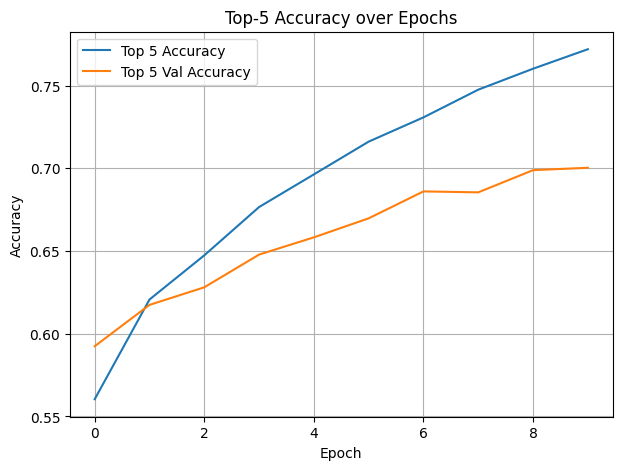

In [ ]:
# top 5
history = xception_history
plt.figure(figsize=(7, 5))
plt.plot(history.history['top_k_categorical_accuracy'], label='Top 5 Accuracy')
plt.plot(history.history['val_top_k_categorical_accuracy'], label='Top 5 Val Accuracy')
plt.title('Top-5 Accuracy over Epochs')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)
plt.show()

Basic Accuracy Graph

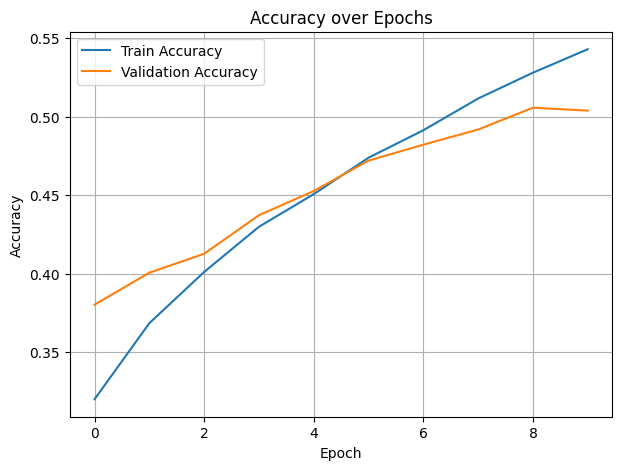

In [ ]:
#  Top-1 Accuracy
plt.figure(figsize=(7, 5))
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Accuracy over Epochs')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)

Loss Curve

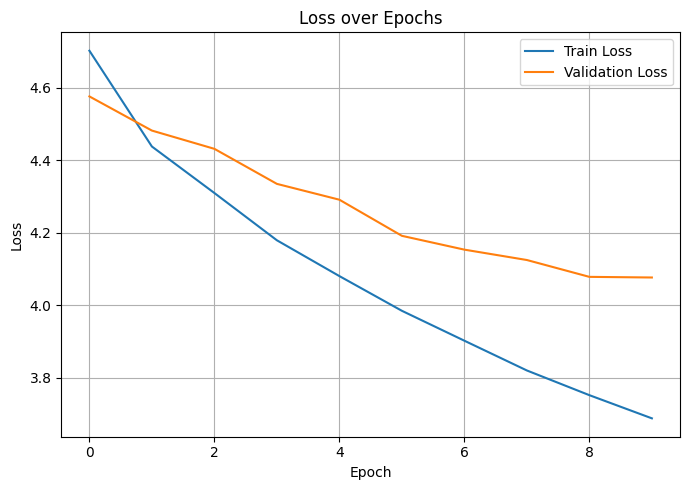

In [ ]:
#  Loss Curve
plt.figure(figsize=(7, 5))
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Loss over Epochs')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()

# **Fine Tune The Xception Model**

We'll unfreeze more layers, use a low learning rate, and run for more epochs.

In [39]:
xception_model = create_xception_model(input_shape=(224, 224, 3), num_classes=7000)

# load previously trained weights
xception_model.load_weights('/content/best_xception_model_model.h5')

# freeze all layers initially
for layer in xception_model.layers:
    layer.trainable = False

#  unfreeze last 35 layers (except BatchNorm)
for layer in xception_model.layers[-35:]:
    if not isinstance(layer, tf.keras.layers.BatchNormalization):
        layer.trainable = True

# compile with a smaller learning rate and label smoothing
xception_model.compile(
    optimizer=Adam(learning_rate=8e-5),
    loss=CategoricalCrossentropy(label_smoothing=0.05),
    metrics=['accuracy', 'top_k_categorical_accuracy']
)

/usr/local/lib/python3.11/dist-packages/keras/src/layers/activations/leaky_relu.py:41: UserWarning: Argument `alpha` is deprecated. Use `negative_slope` instead.
  warnings.warn(


In [40]:
# train the finetuned model
history_finetune_xception = train_model(xception_model, 'xception_model_finetuned', train_generator, val_generator)

Epoch 1/10
3500/3500 ━━━━━━━━━━━━━━━━━━━━ 0s 465ms/step - accuracy: 0.6552 - loss: 3.2634 - top_k_categorical_accuracy: 0.8468

/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()



Epoch 1: val_accuracy improved from -inf to 0.54643, saving model to best_xception_model_finetuned_model.h5


3500/3500 ━━━━━━━━━━━━━━━━━━━━ 1680s 475ms/step - accuracy: 0.6552 - loss: 3.2634 - top_k_categorical_accuracy: 0.8468 - val_accuracy: 0.5464 - val_loss: 3.8700 - val_top_k_categorical_accuracy: 0.7256 - learning_rate: 5.0000e-05
Epoch 2/10
3500/3500 ━━━━━━━━━━━━━━━━━━━━ 0s 459ms/step - accuracy: 0.6909 - loss: 3.1386 - top_k_categorical_accuracy: 0.8644
Epoch 2: val_accuracy improved from 0.54643 to 0.55600, saving model to best_xception_model_finetuned_model.h5


3500/3500 ━━━━━━━━━━━━━━━━━━━━ 1670s 468ms/step - accuracy: 0.6909 - loss: 3.1386 - top_k_categorical_accuracy: 0.8644 - val_accuracy: 0.5560 - val_loss: 3.8379 - val_top_k_categorical_accuracy: 0.7304 - learning_rate: 5.0000e-05
Epoch 3/10
3500/3500 ━━━━━━━━━━━━━━━━━━━━ 0s 467ms/step - accuracy: 0.7001 - loss: 3.0865 - top_k_categorical_accuracy: 0.8691
Epoch 3: val_accuracy improved from 0.55600 to 0.56014, saving model to best_xception_model_finetuned_model.h5


3500/3500 ━━━━━━━━━━━━━━━━━━━━ 1659s 474ms/step - accuracy: 0.7001 - loss: 3.0865 - top_k_categorical_accuracy: 0.8691 - val_accuracy: 0.5601 - val_loss: 3.8067 - val_top_k_categorical_accuracy: 0.7327 - learning_rate: 5.0000e-05
Epoch 4/10
3500/3500 ━━━━━━━━━━━━━━━━━━━━ 0s 433ms/step - accuracy: 0.7104 - loss: 3.0424 - top_k_categorical_accuracy: 0.8755
Epoch 4: val_accuracy did not improve from 0.56014
3500/3500 ━━━━━━━━━━━━━━━━━━━━ 1539s 440ms/step - accuracy: 0.7104 - loss: 3.0424 - top_k_categorical_accuracy: 0.8755 - val_accuracy: 0.5586 - val_loss: 3.8003 - val_top_k_categorical_accuracy: 0.7331 - learning_rate: 5.0000e-05
Epoch 5/10
3500/3500 ━━━━━━━━━━━━━━━━━━━━ 0s 456ms/step - accuracy: 0.7171 - loss: 3.0096 - top_k_categorical_accuracy: 0.8812
Epoch 5: val_accuracy improved from 0.56014 to 0.56221, saving model to best_xception_model_finetuned_model.h5


3500/3500 ━━━━━━━━━━━━━━━━━━━━ 1620s 463ms/step - accuracy: 0.7171 - loss: 3.0096 - top_k_categorical_accuracy: 0.8812 - val_accuracy: 0.5622 - val_loss: 3.7848 - val_top_k_categorical_accuracy: 0.7329 - learning_rate: 5.0000e-05
Epoch 6/10
3500/3500 ━━━━━━━━━━━━━━━━━━━━ 0s 447ms/step - accuracy: 0.7240 - loss: 2.9782 - top_k_categorical_accuracy: 0.8825
Epoch 6: val_accuracy did not improve from 0.56221
3500/3500 ━━━━━━━━━━━━━━━━━━━━ 1584s 453ms/step - accuracy: 0.7240 - loss: 2.9783 - top_k_categorical_accuracy: 0.8825 - val_accuracy: 0.5617 - val_loss: 3.7668 - val_top_k_categorical_accuracy: 0.7371 - learning_rate: 5.0000e-05
Epoch 7/10
3500/3500 ━━━━━━━━━━━━━━━━━━━━ 0s 434ms/step - accuracy: 0.7262 - loss: 2.9563 - top_k_categorical_accuracy: 0.8851
Epoch 7: val_accuracy improved from 0.56221 to 0.56700, saving model to best_xception_model_finetuned_model.h5


3500/3500 ━━━━━━━━━━━━━━━━━━━━ 1545s 441ms/step - accuracy: 0.7262 - loss: 2.9563 - top_k_categorical_accuracy: 0.8851 - val_accuracy: 0.5670 - val_loss: 3.7556 - val_top_k_categorical_accuracy: 0.7381 - learning_rate: 5.0000e-05
Epoch 8/10
3500/3500 ━━━━━━━━━━━━━━━━━━━━ 0s 435ms/step - accuracy: 0.7310 - loss: 2.9306 - top_k_categorical_accuracy: 0.8886
Epoch 8: val_accuracy did not improve from 0.56700
3500/3500 ━━━━━━━━━━━━━━━━━━━━ 1545s 441ms/step - accuracy: 0.7310 - loss: 2.9306 - top_k_categorical_accuracy: 0.8886 - val_accuracy: 0.5665 - val_loss: 3.7409 - val_top_k_categorical_accuracy: 0.7383 - learning_rate: 5.0000e-05
Epoch 9/10
3500/3500 ━━━━━━━━━━━━━━━━━━━━ 0s 434ms/step - accuracy: 0.7355 - loss: 2.9142 - top_k_categorical_accuracy: 0.8908
Epoch 9: val_accuracy improved from 0.56700 to 0.56721, saving model to best_xception_model_finetuned_model.h5


3500/3500 ━━━━━━━━━━━━━━━━━━━━ 1540s 440ms/step - accuracy: 0.7355 - loss: 2.9142 - top_k_categorical_accuracy: 0.8908 - val_accuracy: 0.5672 - val_loss: 3.7422 - val_top_k_categorical_accuracy: 0.7390 - learning_rate: 5.0000e-05
Epoch 10/10
3500/3500 ━━━━━━━━━━━━━━━━━━━━ 0s 440ms/step - accuracy: 0.7399 - loss: 2.8898 - top_k_categorical_accuracy: 0.8929
Epoch 10: val_accuracy improved from 0.56721 to 0.56757, saving model to best_xception_model_finetuned_model.h5


3500/3500 ━━━━━━━━━━━━━━━━━━━━ 1561s 446ms/step - accuracy: 0.7399 - loss: 2.8898 - top_k_categorical_accuracy: 0.8929 - val_accuracy: 0.5676 - val_loss: 3.7216 - val_top_k_categorical_accuracy: 0.7401 - learning_rate: 5.0000e-05
Restoring model weights from the end of the best epoch: 10.


# **Results After Fine Tuning**

After fine-tuning, the Xception model achieved a training accuracy of 73.99% with a top-5 accuracy of 89.29%, and a reduced training loss of 2.89.
On the validation set, accuracy improved to 56.76%, with a top-5 accuracy of 74.01% and a lower validation loss of 3.72.
This reflects a significant performance gain from the initial training phase.

# **Training Curves After Fine-Tuning**

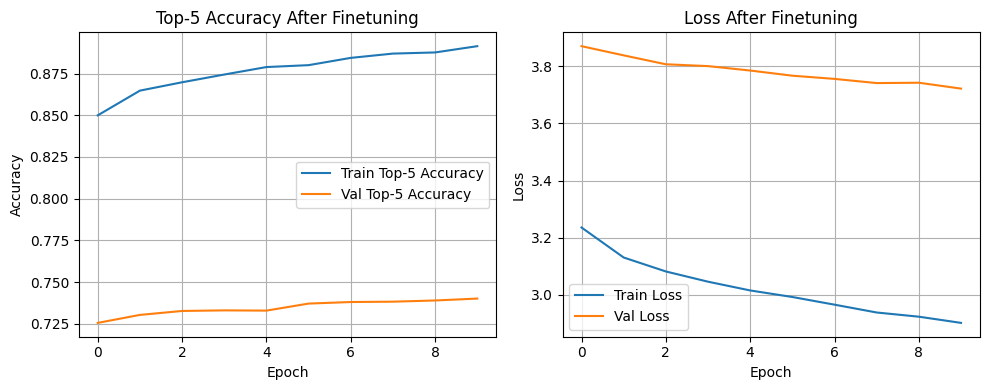

In [41]:
history = history_finetune_xception
plt.figure(figsize=(10, 4))

# top-5 accuracy
plt.subplot(1, 2, 1)
plt.plot(history.history['top_k_categorical_accuracy'], label='Train Top-5 Accuracy')
plt.plot(history.history['val_top_k_categorical_accuracy'], label='Val Top-5 Accuracy')
plt.title('Top-5 Accuracy After Finetuning')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)

# loss
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Val Loss')
plt.title('Loss After Finetuning')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()

Top 1 Accuracy

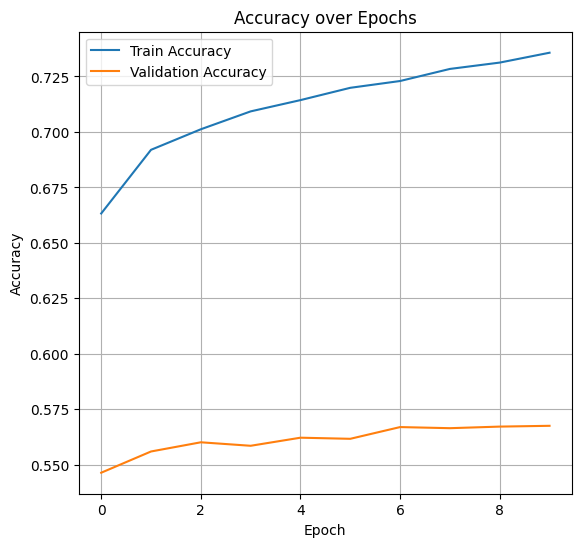

In [42]:
plt.figure(figsize=(14, 6))

# accuracy (top 1)
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Accuracy over Epochs')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)

Evaluation on Test Set

In [43]:
# evaluate on test set
test_loss, test_accuracy, test_top_k_accuracy = xception_model.evaluate(test_generator, verbose=1)

print(f"Test Accuracy: {test_accuracy:.4f}")
print(f"Test Loss: {test_loss:.4f}")
print(f"Test Top-5 Accuracy: {test_top_k_accuracy:.4f}")


438/438 ━━━━━━━━━━━━━━━━━━━━ 37s 84ms/step - accuracy: 0.5672 - loss: 3.7411 - top_k_categorical_accuracy: 0.7422
Test Accuracy: 0.5706
Test Loss: 3.7181
Test Top-5 Accuracy: 0.7442


# **Comparison Of Performance Metrics Of Both Architectures**

ResNet-50 achieved a slightly higher Top-1 accuracy (57.79%) but had a higher loss (3.84) compared to Xception.
Xception showed a lower Top-1 accuracy (57.06%) but outperformed ResNet in Top-5 accuracy (74.42% vs 73.01%) and had a better loss (3.71).
This indicates that while ResNet was marginally better at predicting the top class, Xception was more reliable in the top-5 predictions.
Both models performed comparably, but Xception demonstrated slightly better generalization with lower test loss.

# **Evaluation/CSV File Creation**

In [44]:
# imports
import pandas as pd
import numpy as np
from tensorflow.keras.preprocessing import image
from tqdm import tqdm
import os

In [45]:
# path to test images

test_dir = "/content/dataset/test"
cropped_test_dir = "/content/test_cropped"
os.makedirs(cropped_test_dir, exist_ok=True)

crop images

In [46]:
from tqdm import tqdm
from PIL import Image

for filename in tqdm(os.listdir(test_dir)):
    if filename.lower().endswith(".jpg"):
        img_path = os.path.join(test_dir, filename)
        cropped_img = detect_and_crop_retinaface(img_path)

        if cropped_img:
            # Save cropped face
            cropped_img.save(os.path.join(cropped_test_dir, filename))
        else:
            # If no face detected, save original image
            original_img = Image.open(img_path).convert("RGB").resize((224, 224))
            original_img.save(os.path.join(cropped_test_dir, filename))


100%|██████████| 35000/35000 [01:08<00:00, 509.84it/s]


In [47]:
# pass images
test_datagen = ImageDataGenerator(rescale=1./255)

test_generator_for_csv = test_datagen.flow_from_directory(
    directory="/content",
    classes=["test_cropped"],
    target_size=(224, 224),
    batch_size=32,
    class_mode=None,
    shuffle=False
)

Found 35000 images belonging to 1 classes.


total 35k images! checks out.

predict images

In [48]:
preds_xception = xception_model.predict(test_generator_for_csv, verbose=1)

# Get predicted class indices
predicted_class_indices_xception = np.argmax(preds_xception, axis=1)

1094/1094 ━━━━━━━━━━━━━━━━━━━━ 70s 61ms/step


map class indices to labels

In [49]:
labels_xception = (train_generator.class_indices)
labels_xception = dict((v, k) for k, v in labels_xception.items())  # reverse mapping
predicted_labels_xception = [labels_xception[i] for i in predicted_class_indices_xception]

create csv file

In [50]:
# filenames for test images
filenames_xception = test_generator_for_csv.filenames
image_ids_xception = [os.path.basename(name) for name in filenames_xception]

# create CSV DataFrame
submission_df_xception = pd.DataFrame({
    'image_name': image_ids_xception,
    'label': predicted_labels_xception
})

# Save to CSV
submission_df_xception.to_csv("submission_xception.csv", index=False)
print("✅ CSV FILE CREATED for Xception!")

✅ CSV FILE CREATED for Xception!


In [51]:
import shutil

src_xception = '/content/submission_xception.csv'
dst_xception = '/content/drive/MyDrive/submission_xception.csv'
shutil.copy(src_xception, dst_xception)

print(f"📂 CSV copied to: {dst_xception}")


📂 CSV copied to: /content/drive/MyDrive/submission_xception.csv


----------- end of assignment